In [24]:
import json
import matplotlib.pyplot as plt
from pylab import *
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/apple/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [25]:
# Calculate number of corresponding tweets for each month
def cal_month(month_string, sentiment_list):
    if month_string == "Jan":
        sentiment_list[0] += 1
    elif month_string == "Feb":
        sentiment_list[1] += 1
    elif month_string == "Mar":
        sentiment_list[2] += 1
    elif month_string == "Apr":
        sentiment_list[3] += 1
    elif month_string == "May":
        sentiment_list[4] += 1
    elif month_string == "Jun":
        sentiment_list[5] += 1
    elif month_string == "Jul":
        sentiment_list[6] += 1
    elif month_string == "Aug":
        sentiment_list[7] += 1
    elif month_string == "Sep":
        sentiment_list[8] += 1
    elif month_string == "Oct":
        sentiment_list[9] += 1
    elif month_string == "Nov":
        sentiment_list[10] += 1
    elif month_string == "Dec":
        sentiment_list[11] += 1

In [34]:
pos_month = [0,0,0,0,0,0,0,0,0,0,0,0]
neg_month = [0,0,0,0,0,0,0,0,0,0,0,0]
user = {}

with open("../search_tweet.json") as f:
    for line in f:
        line = line[:-1]
        if len(line) > 0:
            data = json.loads(line)
            result = SentimentIntensityAnalyzer()
            res = result.polarity_scores(data["text"])
            month = data["created_at"][4:7]
            if res["pos"] >= res["neg"]:  
                cal_month(month,pos_month)
            else: 
                cal_month(month,neg_month)
                uid = data["user"]["id"]
                if uid in user:
                    value = user[uid]
                    user[uid] = value+1
                else:
                    user[uid] = 1

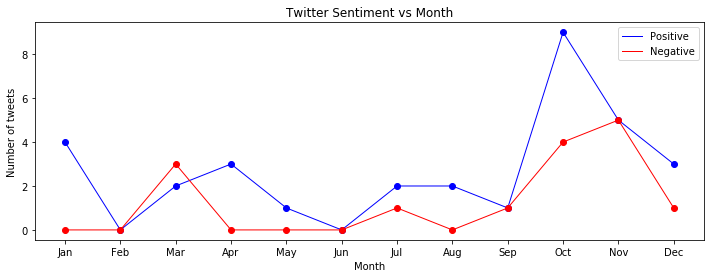

In [33]:
x = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
y1 = pos_month
y2 = neg_month
plt.figure(figsize=(12,4)) # Set the size of the line chart
plt.xticks(arange(len(x)),x) # Customize the x-axis
plt.plot(yt,color = "b", label="Positive", linewidth=1) # Plot points of positive
plt.plot(yt,'ob')

plt.plot(yi,color ="r", label="Negative", linewidth=1) # Plot points of negative
plt.plot(yi,'or')

plt.xlabel("Month") # label of x-axis
plt.ylabel("Number of tweets")  # label of y-axis
plt.title("Twitter Sentiment vs Month") # title of graph
plt.legend()
plt.show() 

In [ ]:
user = sorted(user.items(), key=lambda item:item[1], reverse=True)

print("Top10 User")
if len(user) < 10:
    for i in range(len(user)):    
        print(user[i][0])
else:
    for i in range(10):    
        print(user[i][0])